## R18 ; ggplot2 연습

In [5]:
library(ggplot2)
library(gridExtra)

'data.frame':	272 obs. of  2 variables:
 $ eruptions: num  3.6 1.8 3.33 2.28 4.53 ...
 $ waiting  : num  79 54 74 62 85 55 88 85 51 85 ...


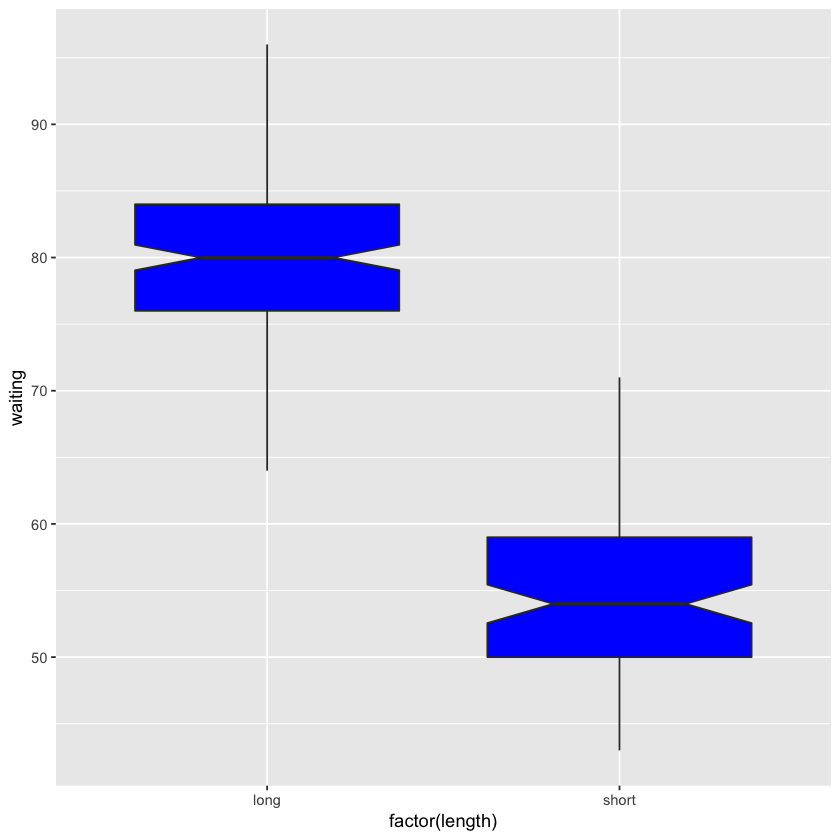

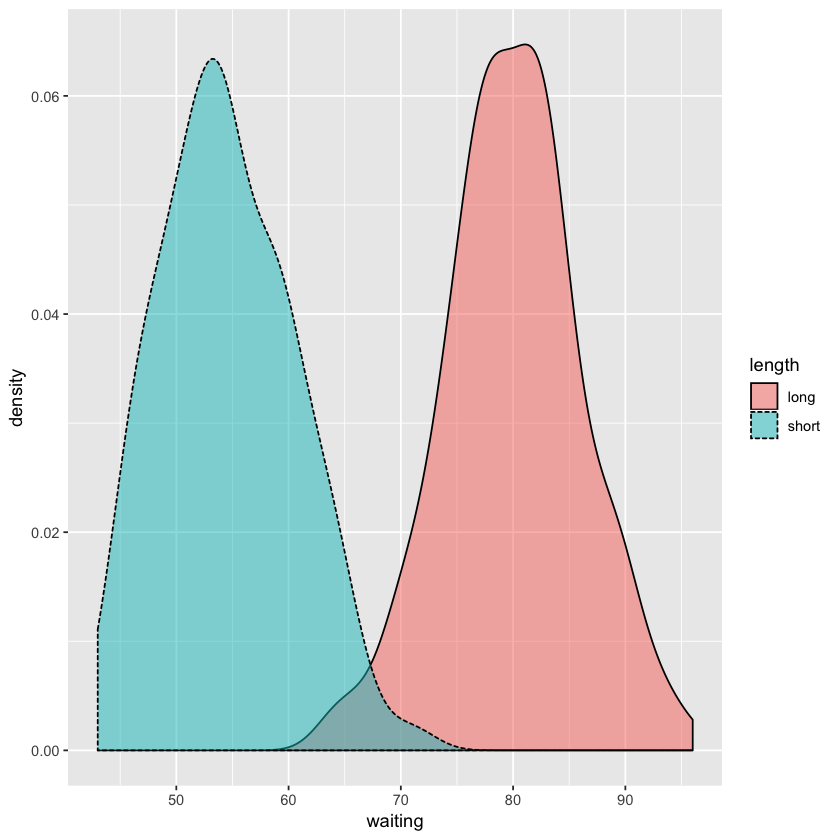

In [20]:
# faithful 데이터셋에 length변수를 생성하여 분출시간 3분 이상인 관측값에 대해서는 long 
# 3분 미만인 관측값에 대해서는 short 저장
# 새롭게 생성된 length를 활용하여 상자도표 밀도도표

data<-faithful
str(data)
data$length <- ifelse(data$eruptions>=3,'long','short')
ggplot(data=data,aes(x=factor(length),y=waiting))+
    geom_boxplot(fill='blue',notch = T)

ggplot(data=data,aes(x=waiting,fill=length,lty=length))+
    geom_density(alpha=0.5)
    

'data.frame':	235 obs. of  2 variables:
 $ height    : num  64 62 66 65 60 61 65 66 65 63 ...
 $ voice.part: Factor w/ 8 levels "Bass 2","Bass 1",..: 8 8 8 8 8 8 8 8 8 8 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


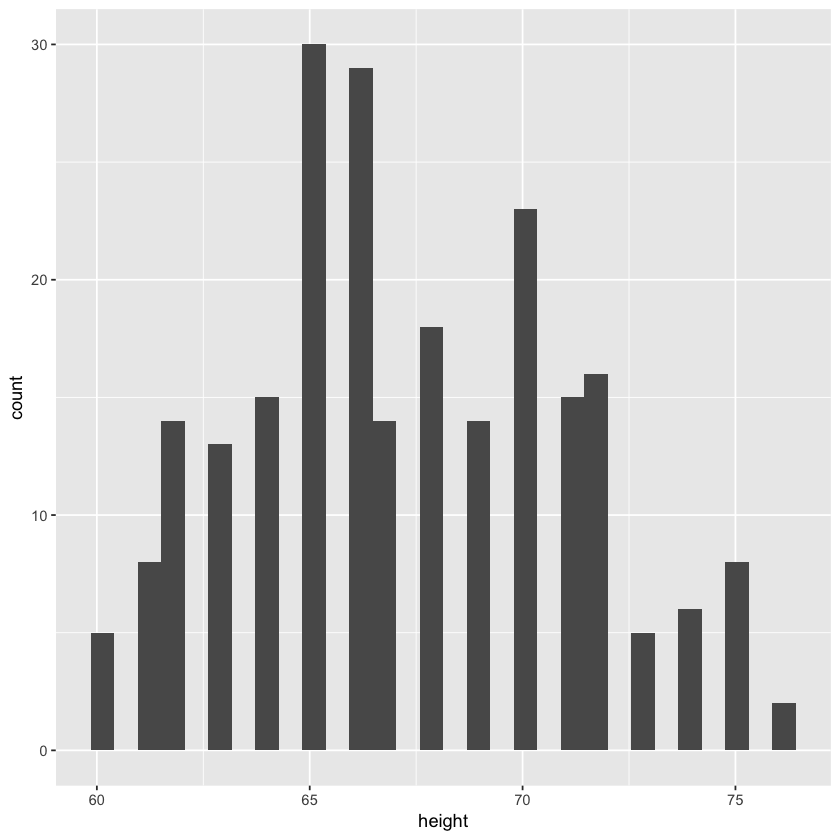

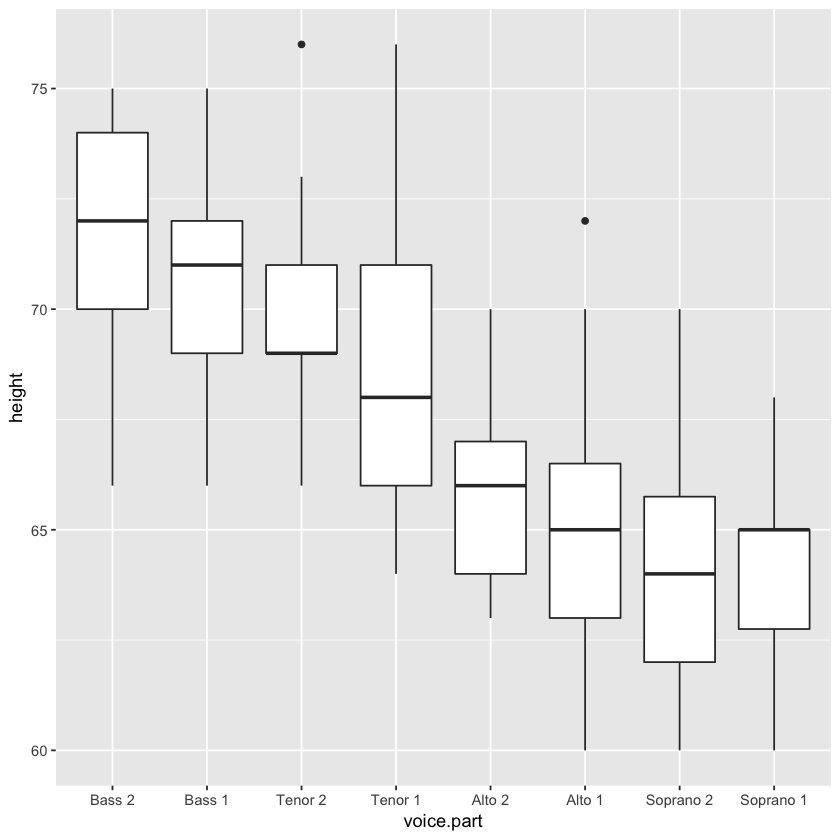

In [26]:
# lattice에 포함된 signer 데이터 셋을 이용하여 키의 히스토그램
# 성부별 상자도표

library(lattice)
str(singer)
ggplot(data=singer,aes(x=height))+geom_histogram()

ggplot(data=singer,aes(x=voice.part,y=height))+geom_boxplot()

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


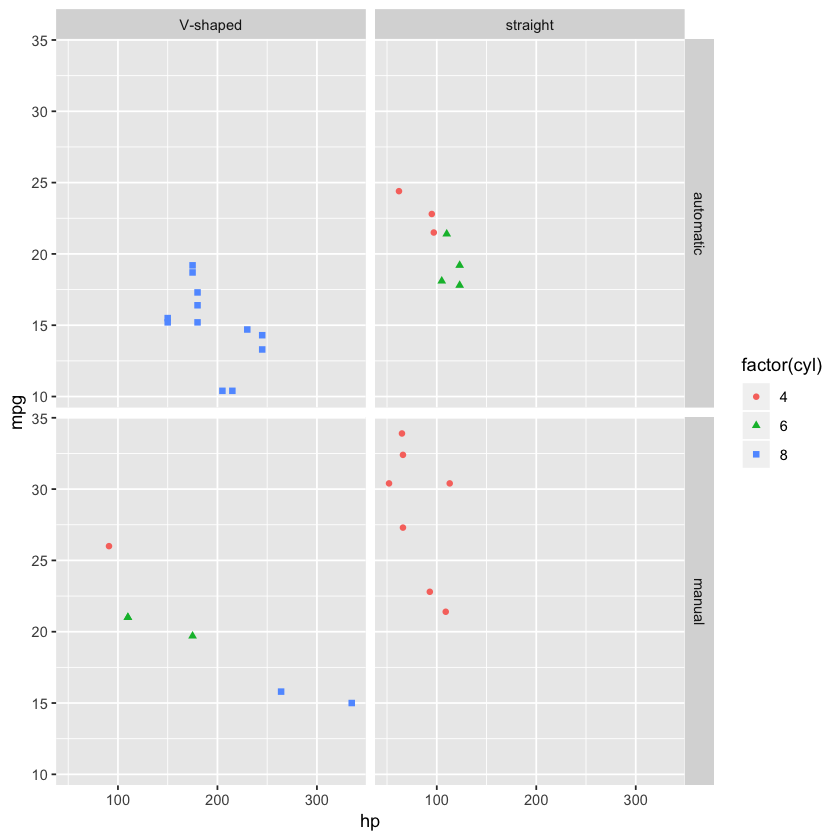

In [37]:
# mtcars 패키지 이용하여 변속기 유형,엔진 유혀에 따른 마력과 연비의 산점도
data(mtcars)
str(mtcars)
mtcars$vs<-factor(mtcars$vs,levels = c(0,1),labels=c('V-shaped','straight'))
mtcars$am<-factor(mtcars$am,levels=c(0,1),labels=c('automatic','manual'))
ggplot(data=mtcars,aes(x=hp,y=mpg,shape=factor(cyl),col=factor(cyl))) +
    geom_point() +
    facet_grid(am~vs) #행기준~열기준

In [42]:
?geom_smooth

'data.frame':	397 obs. of  6 variables:
 $ rank         : Factor w/ 3 levels "AsstProf","AssocProf",..: 3 3 1 3 3 2 3 3 3 3 ...
 $ discipline   : Factor w/ 2 levels "A","B": 2 2 2 2 2 2 2 2 2 2 ...
 $ yrs.since.phd: int  19 20 4 45 40 6 30 45 21 18 ...
 $ yrs.service  : int  18 16 3 39 41 6 23 45 20 18 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 1 ...
 $ salary       : int  139750 173200 79750 115000 141500 97000 175000 147765 119250 129000 ...


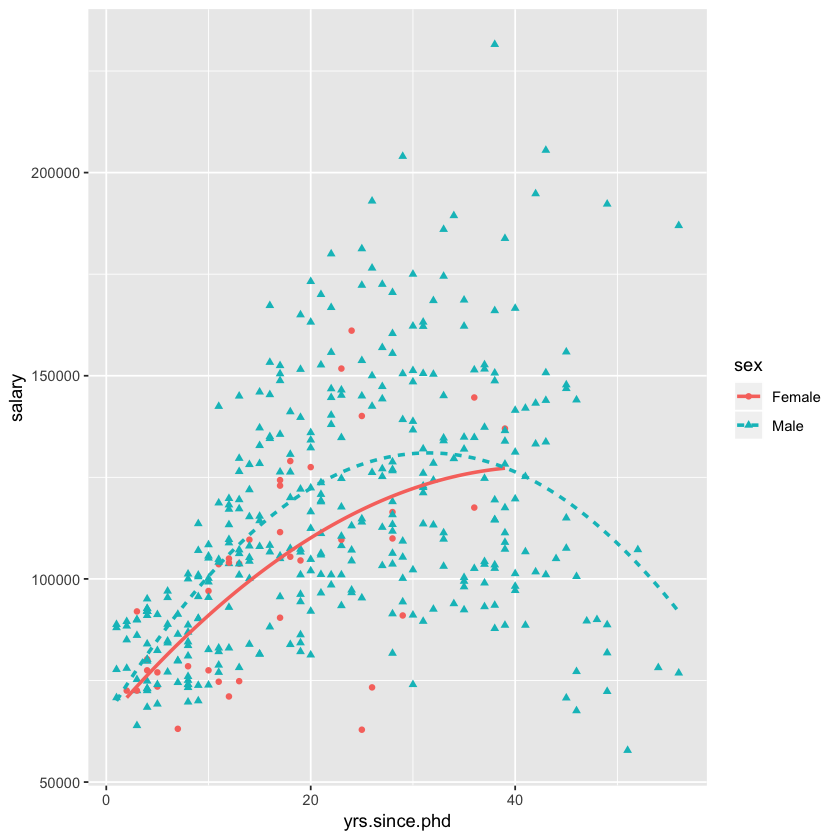

In [45]:
# car 패키지에 포함된 Salaries 데이터셋을 이용하여 박사학위 취득 후 이후의 기관과 연봉 간의
# 산점도 상에 2차 다항회귀식을 사용하여 추세선을 그리시오
library(car)
str(Salaries)
ggplot(Salaries,aes(x=yrs.since.phd,y=salary,col=sex,shape=sex,lty=sex))+
    geom_point()+
    geom_smooth(method='lm',formula = y ~ poly(x, 2),se=F)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


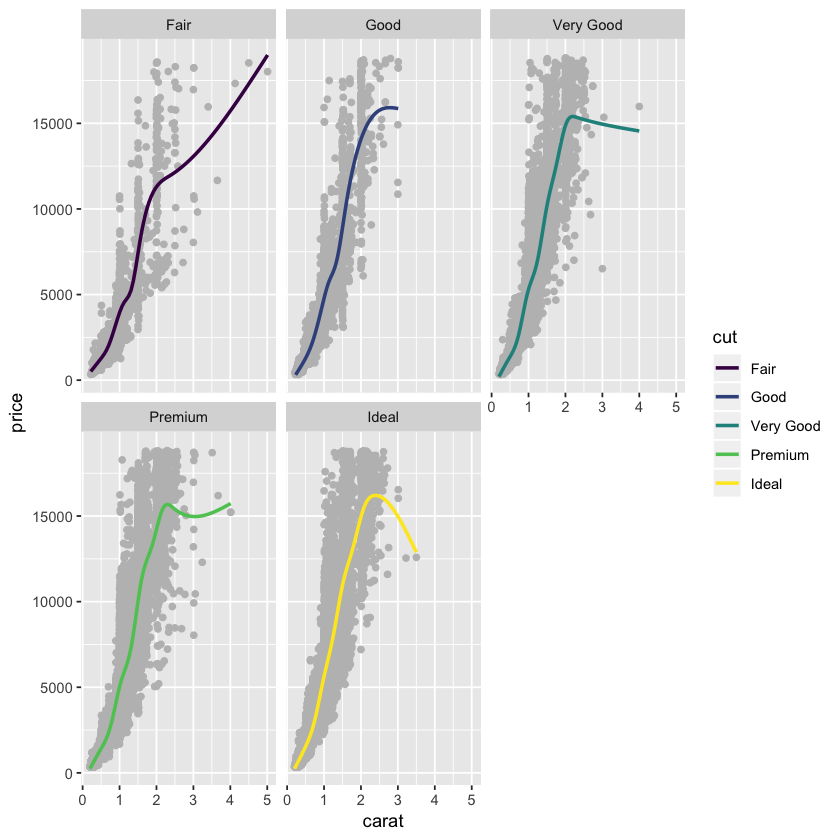

In [64]:
# diamonds 데이터셋에서 무게와 가격 간 산점도를 생성
# 추세선은 컷 등급별 색상으로 구분
library(ggplot2)
str(diamonds)
ggplot(diamonds,aes(x=carat,y=price))+
    geom_point(col='gray') +
    geom_smooth(aes(col=cut),se=F)+
    facet_wrap(~cut,nrow=2)